In [1]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Mon, 23 Mar 2020 15:18


In [3]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"468,008,082","462,229,841","-5,778,241",-1.23%
HOV,"1,194,523","1,174,030","-20,493",-1.72%
Principal Arterial,"11,044,380","12,440,436","1,396,056",12.64%
Ramp,"352,596","290,148","-62,448",-17.71%
Total,"480,599,581","476,134,455","-4,465,126",-0.93%


----
### By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"338,145,881","331,792,742","-6,353,139",-1.88%
Pierce,"76,929,900","79,218,828","2,288,928",2.98%
Snohomish,"65,523,800","65,122,885","-400,915",-0.61%
Total,"480,599,581","476,134,455","-4,465,126",-0.93%


----
### Scatterplots 

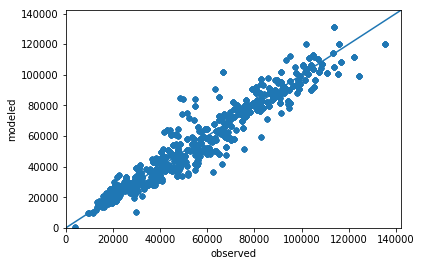

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.954472612867


---
By County

King r^2: 0.959731418927
Pierce r^2: 0.824524586993
Snohomish r^2: 0.985297447542


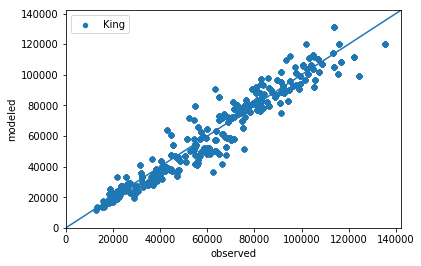

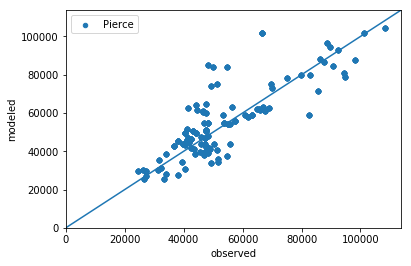

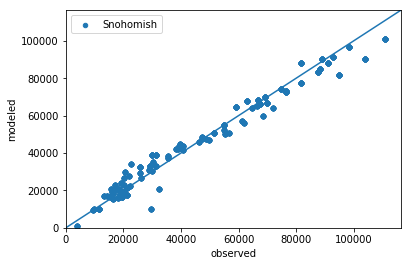

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.944198742175
r^2 Principal Arterial: 0.92433685446


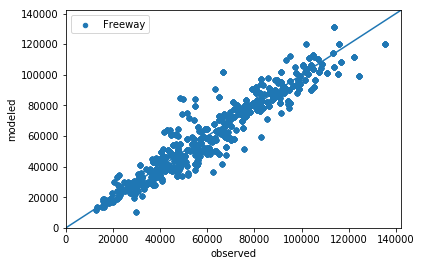

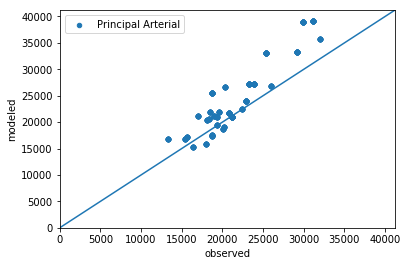

In [10]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","531,464","-36,953",-6.50%
1,KENT,"550,322","491,767","-58,555",-10.64%
2,SEATTLE - SOUTH OF CBD,"526,500","506,548","-19,952",-3.79%
3,SHIP CANAL,"519,802","547,428","27,626",5.31%
4,KIRKLAND-REDMOND,"414,120","390,021","-24,099",-5.82%
5,MILL CREEK,"400,848","388,575","-12,273",-3.06%
6,SOUTH BELLEVUE,"399,500","357,038","-42,462",-10.63%
7,SEATTLE - NORTH,"372,000","373,832","1,832",0.49%
8,TACOMA - EAST OF CBD,"312,164","321,680","9,516",3.05%
9,PARKLAND,"304,322","265,321","-39,001",-12.82%


r^2 : 0.991741506654


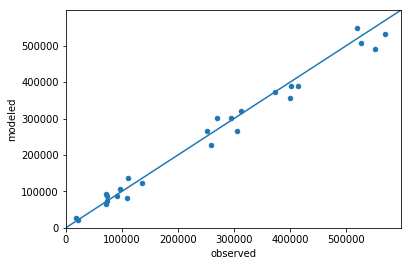

In [12]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [13]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","310,153","-82,541",-21.02%
5,Sound Transit,"145,426","91,803","-53,622",-36.87%
0,Community Transit,"30,918","31,427",509,1.65%
4,Pierce Transit,"27,233","38,095","10,862",39.89%
6,Washington Ferries,"16,912","23,735","6,824",40.35%
3,Kitsap Transit,"7,638","15,506","7,868",103.00%
1,Everett Transit,"3,290","1,593","-1,697",-51.58%


----
### Key Routes
#### Ferries

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF West Seattle - S,"1,356","3,544","2,188",161.40%
1,POF Vashon Island -,670,250,-420,-62.68%
2,WSF Kingston - Edmon,"1,732","1,380",-352,-20.32%
3,WSF Bainbridge Islan,"8,857","10,609","1,752",19.78%
4,WSF Bremerton - Seat,"4,484","9,627","5,142",114.68%
5,WSF Fauntleroy - Sou,365,437,72,19.73%
6,WSF Vashon Island -,946,"1,219",273,28.90%
7,WSF Southworth - Vas,239,407,168,70.49%
8,WSF Point Defiance -,289,56,-232,-80.55%


r^2 : 0.929997955818


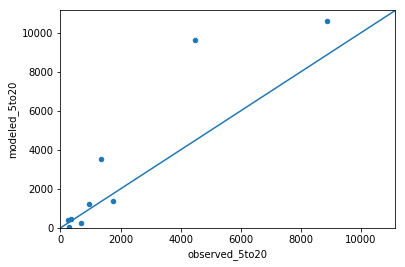

In [15]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### Rail

In [16]:
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","34,652","-34,731",-50.06%
1,Sounder South,"15,356","4,706","-10,650",-69.35%
2,Sounder North,"1,667",863,-803,-48.20%


r^2 : 0.996104506176


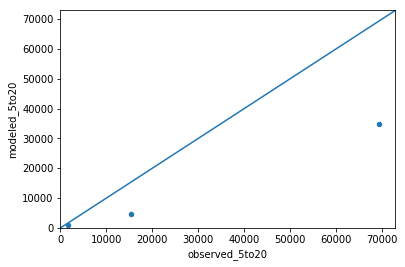

In [17]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [18]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","11,806","-3,530",-23.02%
4,C Line RapidRide,"11,368","10,019","-1,349",-11.86%
2,A Line RapidRide,"8,522","9,380",858,10.07%
1,KC Metro 40,"11,405","9,314","-2,091",-18.33%
10,Sound Transit 550,"9,168","9,201",34,0.37%
5,D Line RapidRide,"13,078","8,802","-4,276",-32.69%
0,KC Metro 7,"10,150","6,655","-3,495",-34.44%
7,F Line RapidRide,"5,267","4,946",-321,-6.09%
3,B Line RapidRide,"5,914","3,792","-2,122",-35.88%
9,First Hill Streetcar,"3,586",882,"-2,704",-75.41%


r^2 : 0.92177249448


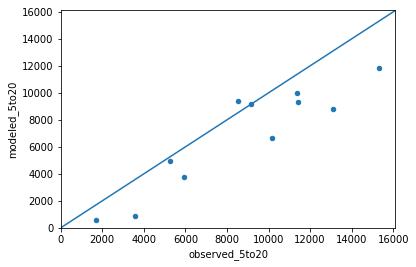

In [19]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

r^2 Community Transit: 0.836176252684


r^2 Everett Transit: -0.318573810789
r^2 King County Metro: 0.942524135497
r^2 Kitsap Transit: 0.31891479442
r^2 Pierce Transit: 0.922851015155


r^2 Sound Transit: 0.974819917022


r^2 Washington Ferries: 0.937709196497


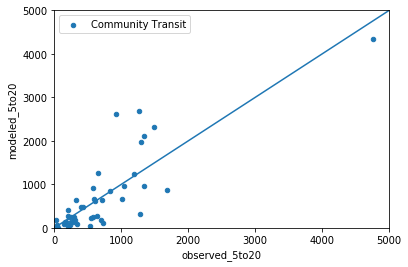

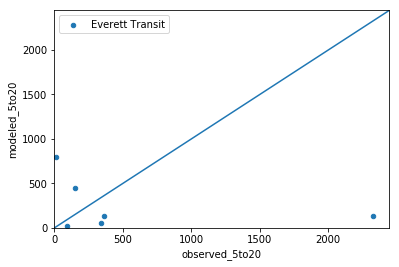

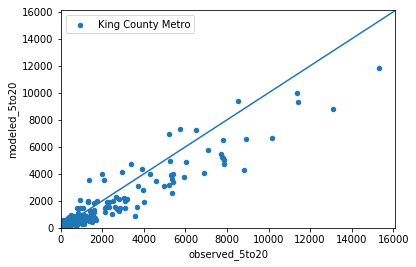

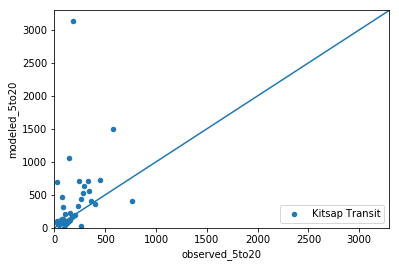

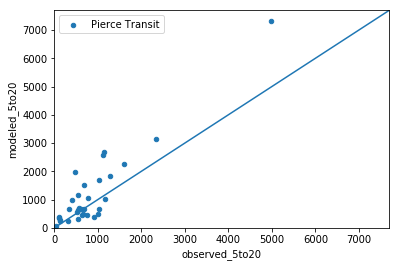

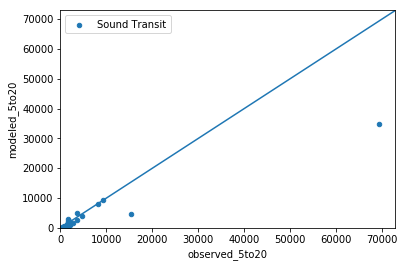

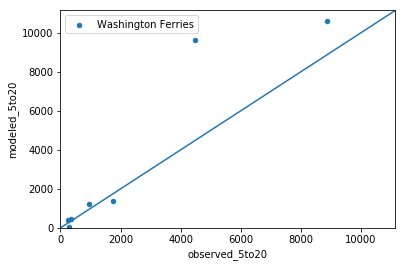

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [21]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","3,884","-5,532",-58.75%
Westlake,"10,904","4,403","-6,501",-59.62%
University St,"5,257","2,924","-2,333",-44.38%
Pioneer Square,"3,865","4,398",533,13.78%
Int'l District,"5,647","1,818","-3,829",-67.81%
Capitol Hill,"7,016","3,398","-3,618",-51.56%
Stadium,"1,912",348,"-1,564",-81.79%
SODO,"2,108","1,533",-575,-27.28%
Beacon Hill,"2,587",769,"-1,818",-70.27%


Sound Transit Station Groupings

In [22]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","3,884","-5,532",-58.75%
Capitol Hill,"7,016","3,398","-3,618",-51.56%
Westlake/University St,"16,161","7,327","-8,833",-54.66%
Pioneer Square/Int'l District,"9,512","6,216","-3,297",-34.66%
Stadium/SODO,"4,020","1,881","-2,139",-53.21%
Beacon Hill/Mount Baker,"4,809","1,811","-2,998",-62.34%
Columbia City,"2,376",736,"-1,640",-69.04%
Othello/Rainier Beach,"4,412","1,579","-2,833",-64.20%
Tukwila Int'l Blvd,"2,779","1,144","-1,635",-58.82%


# Stop Transfers

### Light Rail

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.25,-99.00,99.25,-100.25%
Westlake,0.51,0.36,0.15,40.37%
University St,0.65,0.20,0.45,222.83%
Pioneer Square,0.83,0.16,0.67,421.82%
Int'l District,0.79,0.45,0.34,76.51%
Capitol Hill,0.08,-99.00,99.08,-100.08%
Stadium,0.47,0.12,0.35,291.53%
SODO,0.55,0.31,0.24,76.89%
Beacon Hill,0.34,0.35,-0.02,-5.06%


# Externals

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","123,953","-6,047",-4.65%
I-5 to Mount Vernon,3744,"67,000","56,679","-10,321",-15.40%
I-90 @ Snoqualmie Pass,3739,"33,000","28,998","-4,002",-12.13%
SR-532 to Camano Island,3746,"23,000","19,990","-3,010",-13.09%
SR-507 to Yelm,3734,"23,000","19,453","-3,547",-15.42%
SR-3 to Belfair,3749,"18,000","16,046","-1,954",-10.85%
Hood Canal Bridge,3748,"18,000","16,148","-1,852",-10.29%
SR-530 N/O Stanwood,3745,"9,100","8,319",-781,-8.58%
Mukilteo-Clinton Ferry,3747,"6,300","5,891",-409,-6.49%
